In [278]:

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

# Load the banking Dataset

mydata = pd.read_csv("/Users/radhamahesh/Desktop/AI-ML Materials/Bank_Personal_Loan_Modelling.csv")


mydata.head()



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [219]:
mydata.shape

(5000, 14)

In [220]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [221]:
# Check if any missing value
mydata.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [222]:
mydata.describe()
#Min experience is showing negative values, which is incorrect, so we have to clean that column


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [223]:
#Min experience is showing negative values, which is incorrect, so we have to clean that column
print(mydata[mydata['Experience'] == -1]['Experience'].count())
print(mydata[mydata['Experience'] == -2]['Experience'].count())
print(mydata[mydata['Experience'] == -3]['Experience'].count())
print(mydata[mydata['Experience'] < 0]['Experience'].count())
        

33
15
4
52


In [224]:
#finding unique data
mydata.apply(lambda x: len(x.unique()))


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [225]:
#clean the negative variable
Exp = mydata.loc[mydata['Experience'] >0]
negExp = mydata.Experience < 0
column_name = 'Experience'
mylist = mydata.loc[negExp]['ID'].tolist()# getting the customer ID who has negative experience

# there are 52 records with negative experience
print(negExp.value_counts())

#Filter the records matching the above criteria from the data frame which has records with positive experience
#and take the median
#Apply the median back to the location which had negative experience

for id in mylist:
    age = mydata.loc[np.where(mydata['ID']==id)]["Age"].tolist()[0]
    education = mydata.loc[np.where(mydata['ID']==id)]["Education"].tolist()[0]
    df_filtered = Exp[(Exp.Age == age) & (Exp.Education == education)]
    exp = df_filtered['Experience'].median()
    mydata.loc[mydata.loc[np.where(mydata['ID']==id)].index, 'Experience'] = exp
    

False    4948
True       52
Name: Experience, dtype: int64


In [226]:
# checking if there are records with negative experience
mydata[mydata['Experience'] < 0]['Experience'].count()

0

In [227]:
mydata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [228]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28d63810>,
      dtype=object)

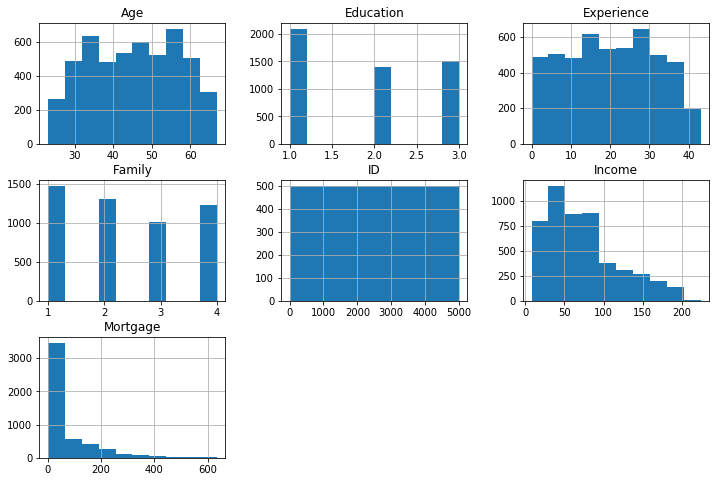

In [229]:
features = ['ID', 'Age', 'Experience', 'Family','Income','Education','Mortgage']
mydata[features].hist(figsize=(12, 8))

In [230]:
print('\033[1m' + 'Study the data distribution in each attribute, share your findings')

print('\033[0m' +'ID: This attribute can be dropped.Though the data distribution is normal')

print('Age:The distribution looks normal')

print('Experience:The distribution looks normal. Seems similar to Age')

print('Education : Mean and median is almost equal. Data is finely distributed.')

print('Family : It has 4 values, families with least member is highest in the sample.')

print('Income : We can clearly see data is highly left skewed.Data for less income customers is more in the sample')

print('Mortgage : We can clearly see data is highly left skewed.Most customers have less mortagage in the sample')



Study the data distribution in each attribute, share your findings
ID: This attribute can be dropped.Though the data distribution is normal
Age:The distribution looks normal
Experience:The distribution looks normal. Seems similar to Age
Education : Mean and median is almost equal. Data is finely distributed.
Family : It has 4 values, families with least member is highest in the sample.
Income : We can clearly see data is highly left skewed.Data for less income customers is more in the sample
Mortgage : We can clearly see data is highly left skewed.Most customers have less mortagage in the sample


Observation:Majority of customers do not have securities account


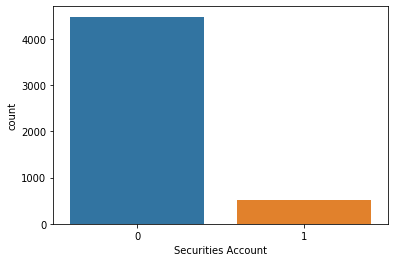

In [231]:
sns.countplot(x="Securities Account", data=mydata)
print('Observation:Majority of customers do not have securities account')

Observation:Majority of customers use online banking in the sample


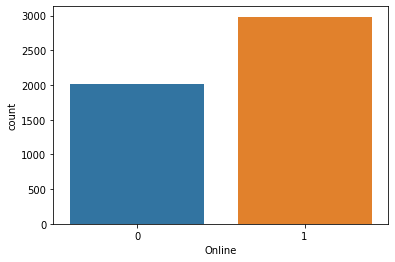

In [232]:
sns.countplot(x="Online", data=mydata)
print('Observation:Majority of customers use online banking in the sample')

Observation:Data from particular places has been collected more based on the high spikes. More data can be collected from different places


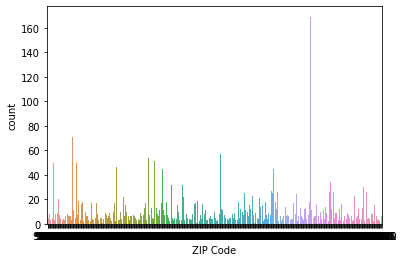

In [233]:
sns.countplot(x="ZIP Code", data=mydata)
print('Observation:Data from particular places has been collected more based on the high spikes. More data can be collected from different places')

Observation:Majority of customers do not have credit cards in the sample


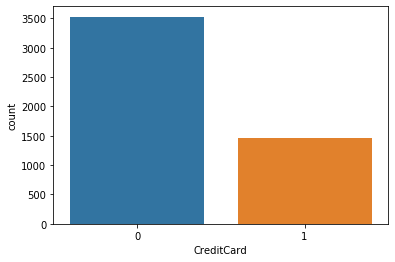

In [235]:
sns.countplot(x="CreditCard", data=mydata)
print('Observation:Majority of customers do not have credit cards in the sample')

Observation:Majority of customers do not have CD account in the sample


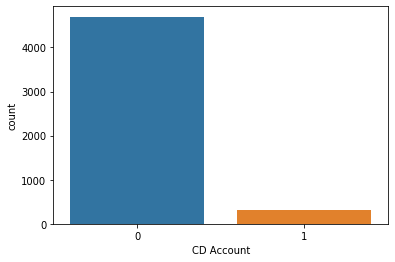

In [237]:
sns.countplot(x="CD Account", data=mydata)
print('Observation:Majority of customers do not have CD account in the sample')

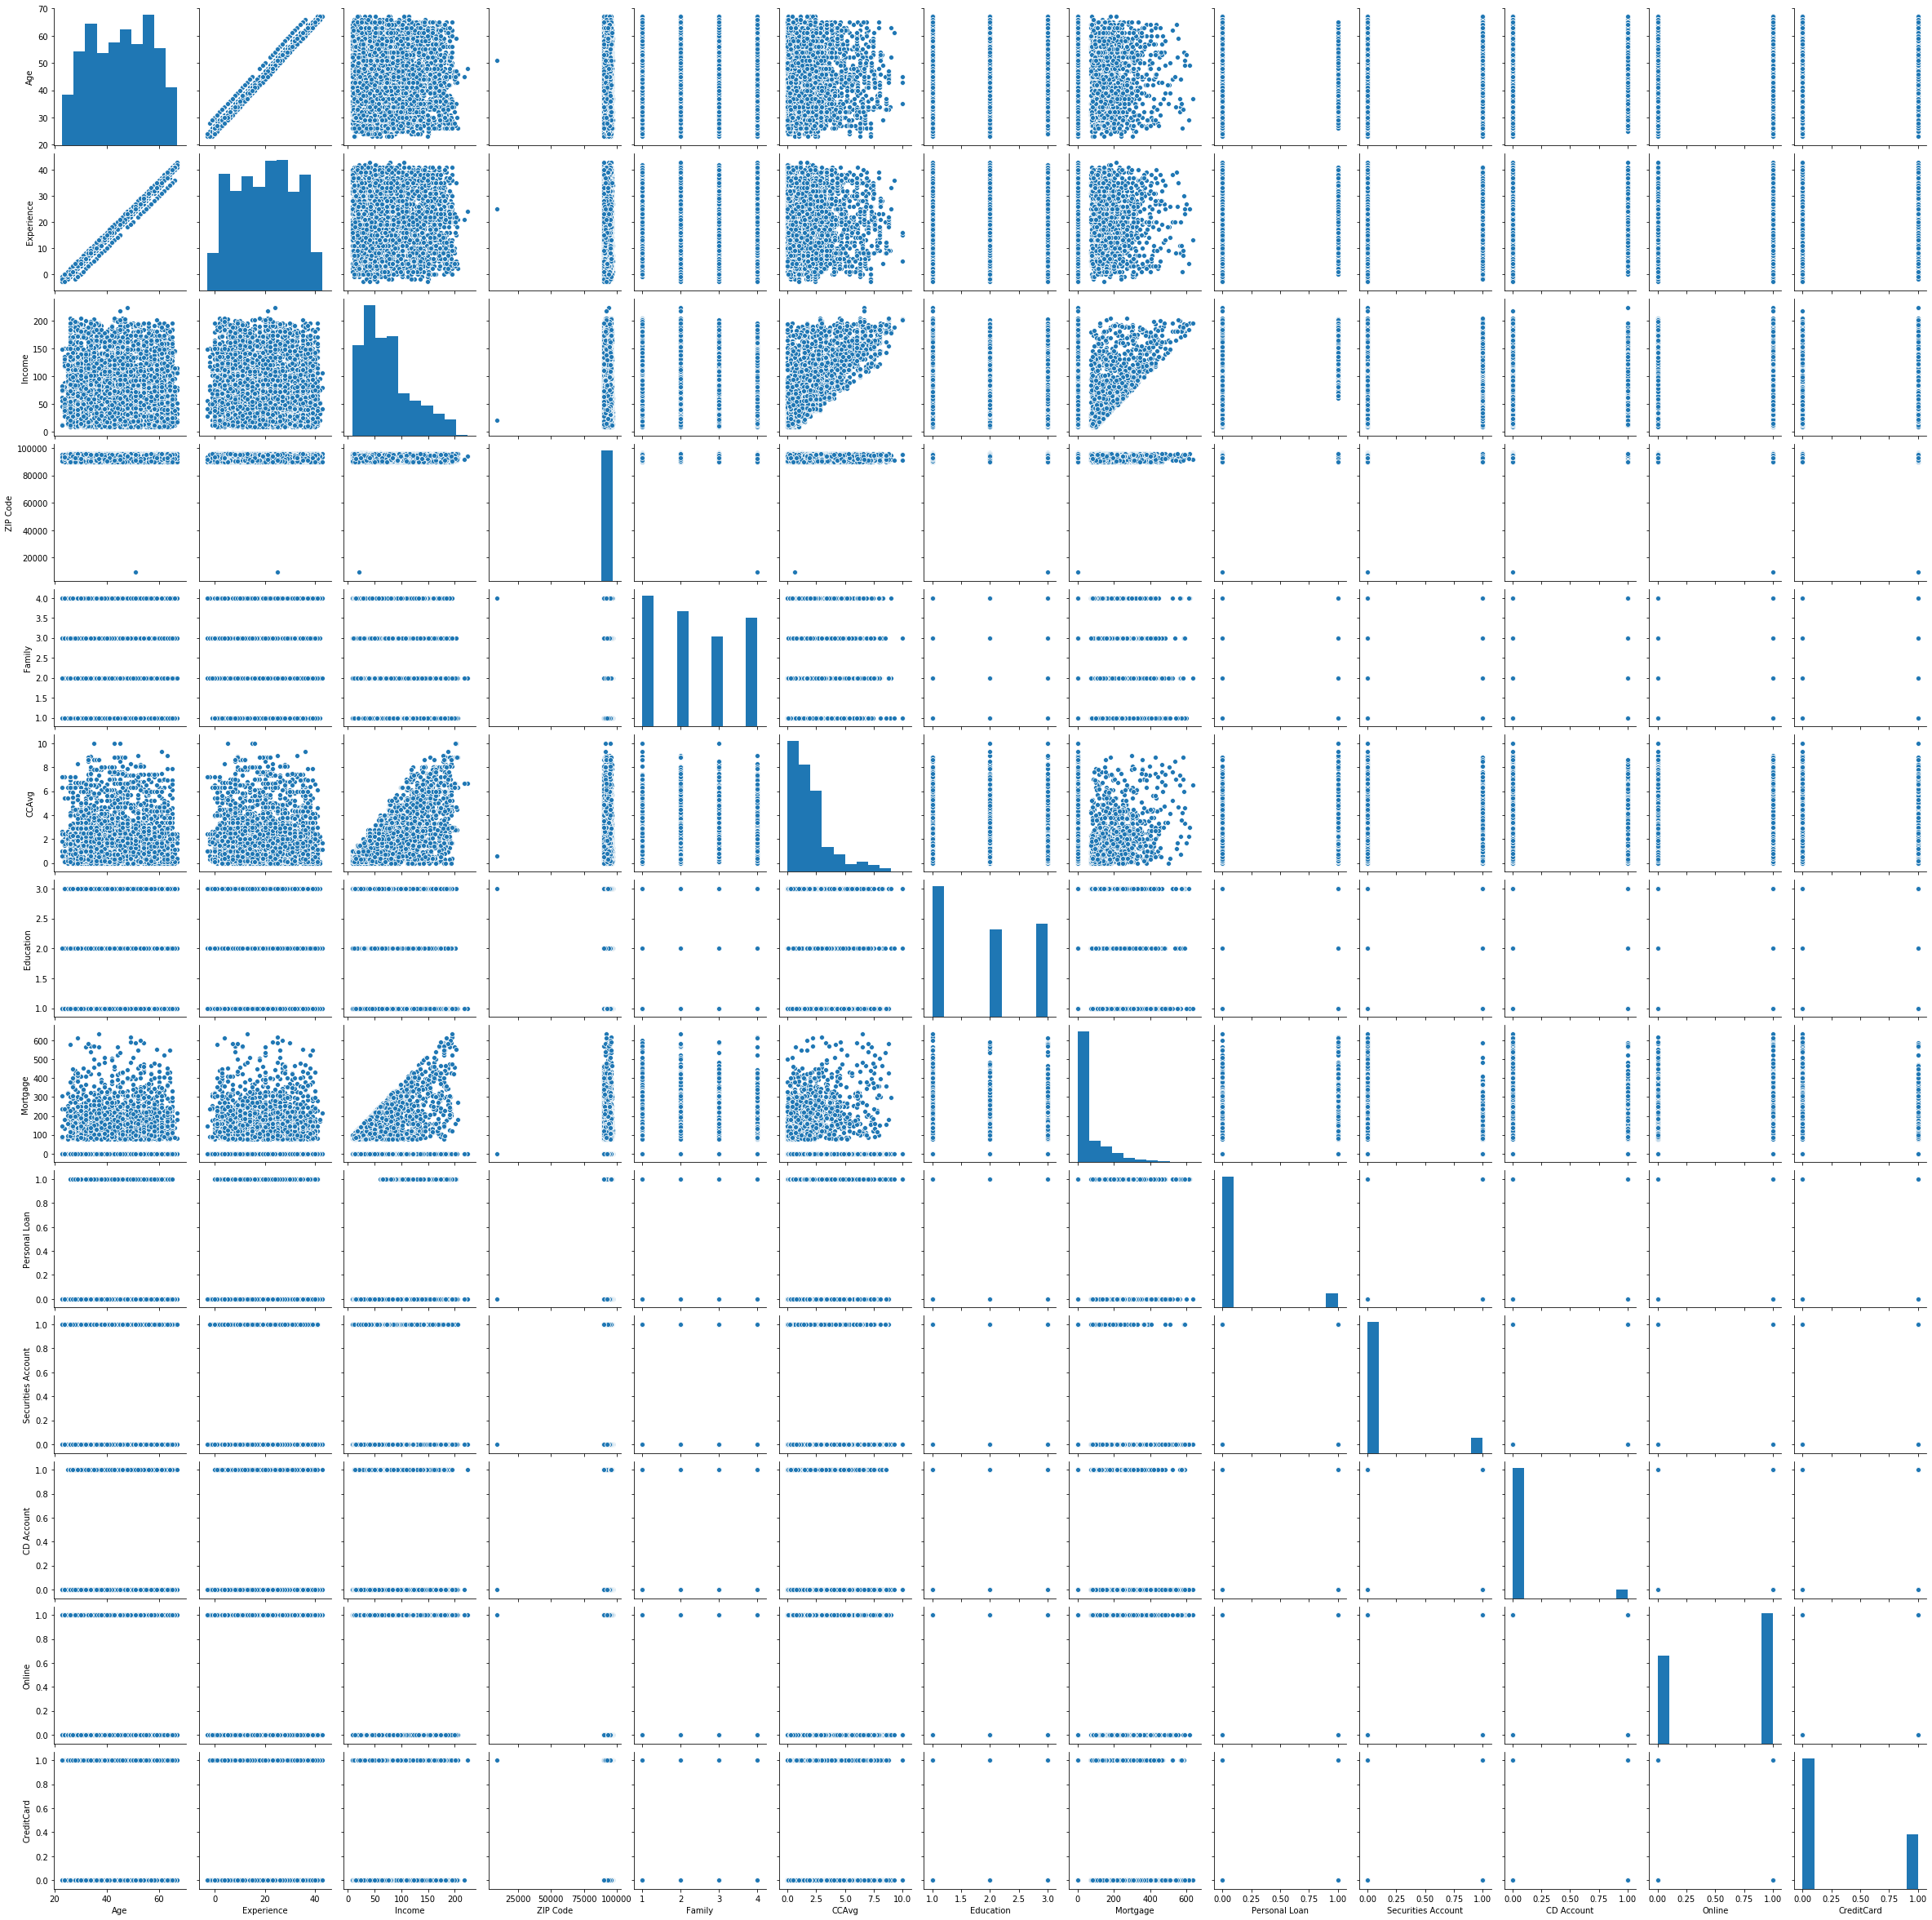

In [65]:
sns.pairplot(mydata.iloc[:,1:])

In [62]:
print('Relationship between attributes in the sample')
mydata.corr()

Relationship between attributes in the sample


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [64]:
print('\033[1m' +'Target Column distribution:')

mydata["Personal Loan"].value_counts()


Target Column distribution


0    4520
1     480
Name: Personal Loan, dtype: int64

In [238]:

mydata.groupby(mydata['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.285905,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


The box plots show that those with education level 1 have higher incomes.
But customers who go for personal loans have the same income distribution regardless of the education level.


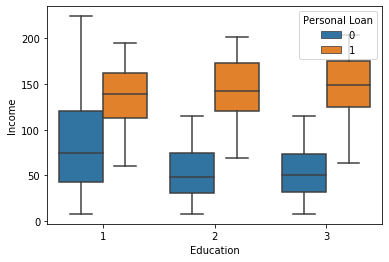

In [239]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=mydata)
#Observation:
print('The box plots show that those with education level 1 have higher incomes.') 
print ('But customers who go for personal loans have the same income distribution regardless of the education level.')

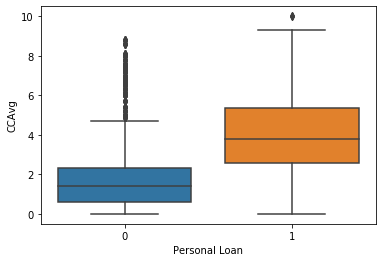

In [240]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=mydata)

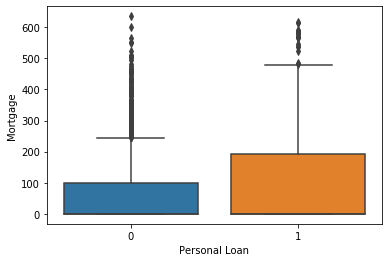

In [241]:
sns.boxplot(x='Personal Loan',y='Mortgage',data=mydata)
#Observation
#Customers who taken loan also have higher mortgages.

In [242]:
mydata_test=mydata[['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']]
mydata_grp=mydata_test.groupby('Personal Loan').sum()
mydata_grp

,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,
0,462,162,2693,1327
1,60,140,291,143


Observation: No impact of Credit Card on the personal loan


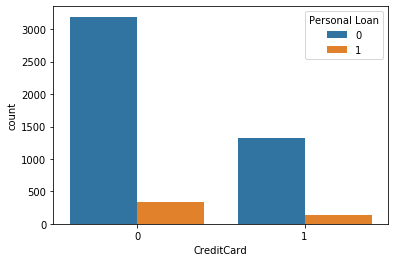

In [243]:
sns.countplot(x="CreditCard", data=mydata,hue="Personal Loan")
print('Observation: No impact of Credit Card on the personal loan')



In [245]:
my_test_1=mydata[['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']]
my_grp=my_test_1.groupby('Personal Loan').sum()
my_grp

,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,
0,462,162,2693,1327
1,60,140,291,143


Observation:Customers education does not seem to have much effect on personal loan


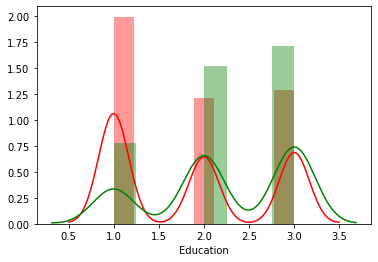

In [246]:
sns.distplot(mydata[mydata['Personal Loan'] == 0]['Education'], color = 'r')
sns.distplot(mydata[mydata['Personal Loan'] == 1]['Education'], color = 'g')
print('Observation:Customers education does not seem to have much effect on personal loan')

Observation:Customers who have availed personal loan have high mortgage


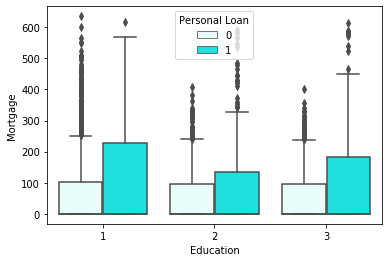

In [15]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=mydata,color='cyan')

print('Observation:Customers who have availed personal loan have high mortgage')

Observation: Customers who have availed personal loan have higher credit card average than those who did not avail. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.


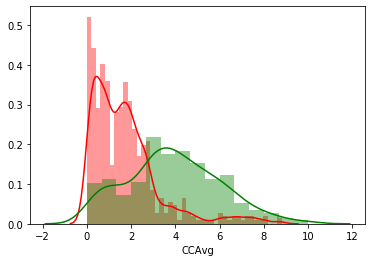

In [247]:
sns.distplot( mydata[mydata['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( mydata[mydata['Personal Loan'] == 1]['CCAvg'], color = 'g')
print('Observation: Customers who have availed personal loan have higher credit card average than those who did not avail. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.')

Observation:Majority of customers does not have loan have securities account


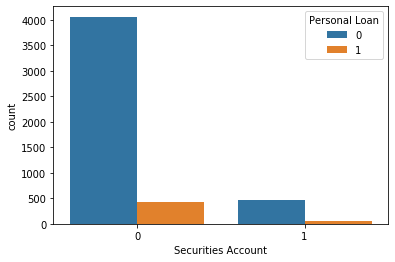

In [249]:
sns.countplot(x="Securities Account", data=mydata,hue="Personal Loan")
print('Observation:Majority of customers does not have loan have securities account')

Observation:Family size does not seem to have impact on customers availing personal loan


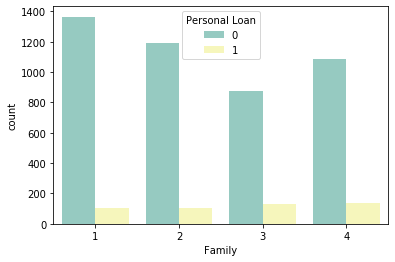

In [250]:
sns.countplot(x='Family',data=mydata,hue='Personal Loan',palette='Set3')
print('Observation:Family size does not seem to have impact on customers availing personal loan')

Observation:Almost all of customers who have CD account has personal loan as well. But majority of customers do not have CD account


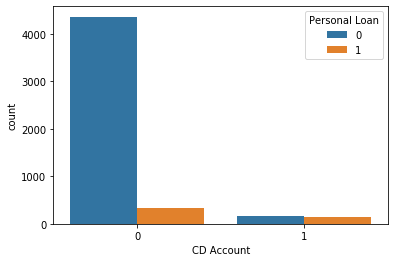

In [251]:
sns.countplot(x='CD Account',data=mydata,hue='Personal Loan')
print('Observation:Almost all of customers who have CD account has personal loan as well. But majority of customers do not have CD account')


In [252]:
print('Credit card spending of Non-Loan customers: ',mydata[mydata['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', mydata[mydata['Personal Loan'] == 1]['CCAvg'].median()*1000)

print('Observation:')

print('Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.')
print('Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.')


Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0
Observation:
Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.
Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.


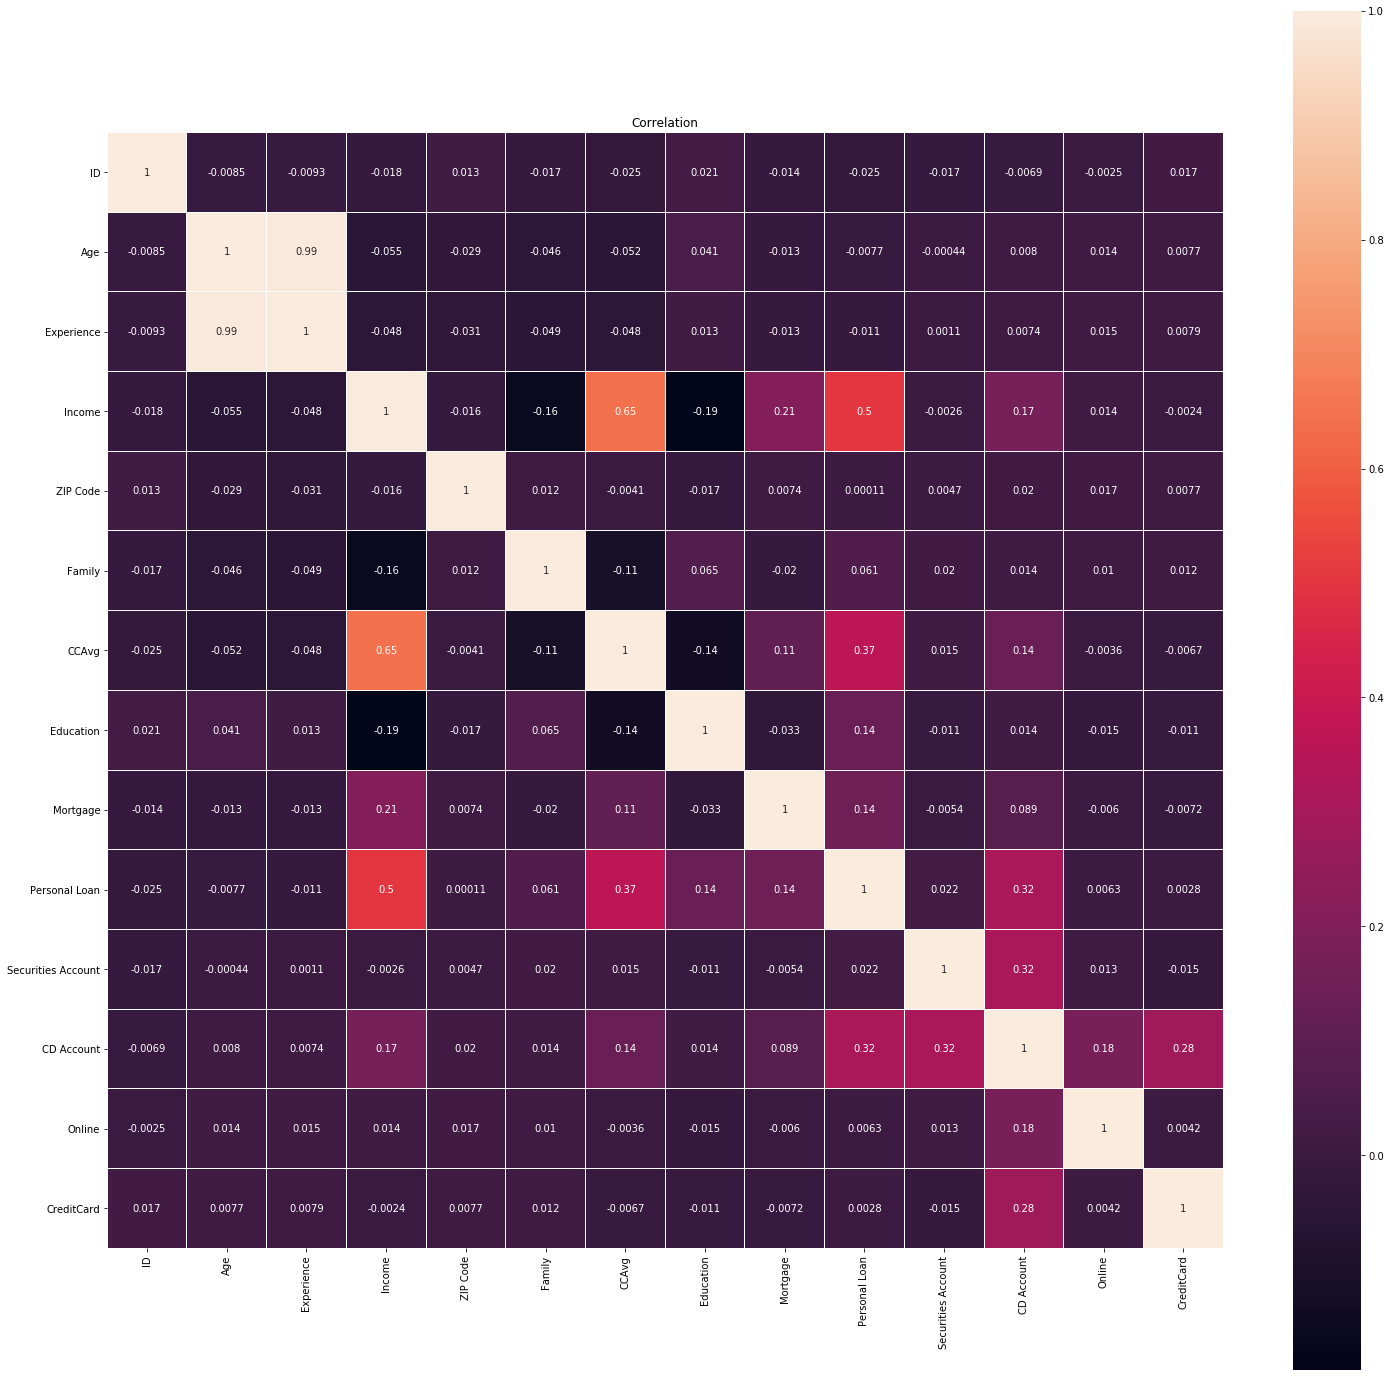

Age and Experience is highly corelated
Income and CCAvg also corelated


In [253]:

from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(mydata.corr(), square=True, annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

print ('Age and Experience is highly corelated')
print('Income and CCAvg also corelated')

As you can see only columns like Income,CCavg and CD account have some kind of relation with the target column Personal Loan


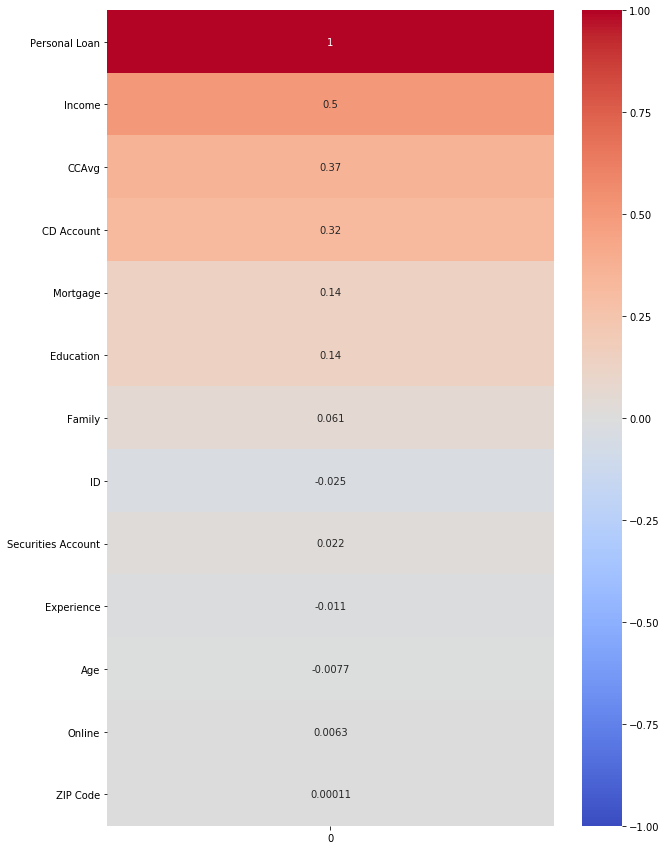

In [254]:
#correlation between all of the numeric variables in the data frame and the target column personal loan
correlations = mydata.corrwith(mydata['Personal Loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

print('As you can see only columns like Income,CCavg and CD account have some kind of relation with the target column Personal Loan')

In [279]:
X = mydata.drop("Personal Loan",axis=1)
Y = mydata["Personal Loan"]

In [280]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)


In [281]:
X_train=X_train.drop(['Experience','ID'],axis=1)
X_test=X_test.drop(['Experience','ID'],axis=1)

In [282]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.007155  0.037557 -0.000071  0.015505  0.005647  0.018257  0.000537   

          7         8         9        10  intercept  
0  0.001144  0.004903 -0.000517 -0.000134  -0.000084  


In [283]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.8993333333333333


In [284]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1360
           1       0.08      0.12      0.10       140

    accuracy                           0.79      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.83      0.79      0.81      1500



In [102]:
X_train=X_train.drop(['Family','ZIP Code','Online','Age','Education','Securities Account'],axis=1)
X_test=X_test.drop(['Family','ZIP Code','Online','Age','Education','Securities Account'],axis=1)

In [103]:
# Fit the model on train - Iteration 2
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4  intercept
0  0.034126  0.043506  0.000251  2.459709 -0.790388  -5.929334


In [104]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.914


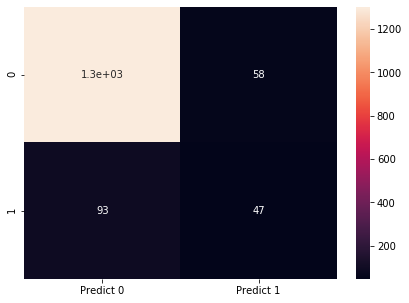

In [285]:
cm=metrics.confusion_matrix(Y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [107]:
# Fit the model on train - Iteration 3
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4  intercept
0  0.034126  0.043506  0.000251  2.459709 -0.790388  -5.929334


In [108]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.914


In [109]:
X_train=X_train.drop(['CCAvg'],axis=1)
X_test=X_test.drop(['CCAvg'],axis=1)

In [110]:
# Fit the model on train - Iteration 4
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3  intercept
0  0.035305  0.000213  2.460976 -0.780832  -5.933524


In [111]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.9133333333333333


In [115]:
X_New= mydata.iloc[:,0:11]
Y_New= mydata.iloc[:,11]
Y_New

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: CD Account, Length: 5000, dtype: int64

In [116]:
standardized_X = preprocessing.scale(X_New)
standardized_X

array([[-1.73170443, -1.77441684, -1.66607847, ..., -0.55552393,
        -0.32587527,  2.92891517],
       [-1.73101161, -0.02952359, -0.09633022, ..., -0.55552393,
        -0.32587527,  2.92891517],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.55552393,
        -0.32587527, -0.34142334],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.55552393,
        -0.32587527, -0.34142334],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.55552393,
        -0.32587527, -0.34142334],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.55552393,
        -0.32587527, -0.34142334]])

In [117]:
#normalize the data attributes
normalized_X = preprocessing.normalize(X_New)

In [118]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_New, Y_New, test_size=0.30, random_state=15)

In [119]:
logreg = LogisticRegression()
logreg.fit(X1_train, Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
Y1_pred = logreg.predict(X1_test)

In [125]:
mod_score = logreg.score(X1_train, Y1_train)
print(mod_score)

0.94


In [126]:
mod_score = logreg.score(X1_test, Y1_test)
print(mod_score)

0.9386666666666666


In [152]:
confusion_matrix = confusion_matrix(Y1_test, Y1_pred)
print(confusion_matrix)


[[1408    0]
 [  92    0]]


In [136]:
mydata

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [138]:
# import zscore for scaling the data
from scipy.stats import zscore

P = mydata.drop("Personal Loan",axis=1)
Q = mydata["Personal Loan"]

X_train,X_test,Y_train,Y_test = train_test_split(P,Q,test_size=0.3,random_state=10)


X_train=X_train.drop(['Experience','ID'],axis=1)
X_test=X_test.drop(['Experience','ID'],axis=1)

In [139]:
# Apply zscore on independent features
xtrainsc = X_train.apply(zscore)
xtestsc = X_test.apply(zscore)

In [140]:
# Fit the logistic regression model on scaled data 

model1 = LogisticRegression(random_state=0)
model1.fit(xtrainsc, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
model1.score(xtrainsc, Y_train)

0.9502857142857143

In [142]:
model1.score(xtestsc, Y_test)

0.9553333333333334

In [144]:
ypred = model1.predict(xtestsc)
ypred

array([0, 0, 0, ..., 0, 0, 0])

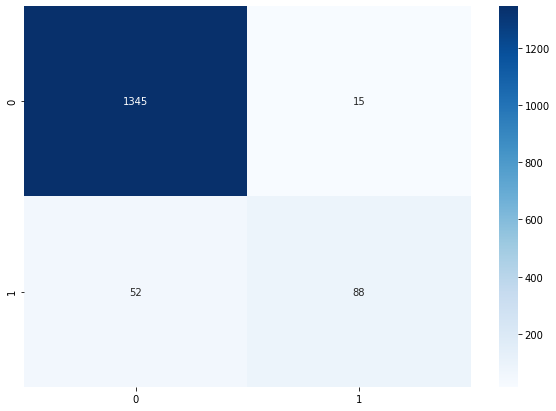

In [147]:
conf_mat = confusion_matrix(Y_test, ypred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

In [148]:
model1.classes_

array([0, 1])

In [149]:
model1.intercept_

array([-4.64534127])

In [150]:
xtestsc.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
245,-0.904509,-1.076366,-0.330271,-0.345160,-0.53171,0.168573,-0.53792,-0.339473,-0.26003,-1.264774,-0.629800
4493,0.575628,-0.030107,1.613475,-1.209502,0.37950,0.168573,-0.53792,-0.339473,-0.26003,0.790655,1.587806


In [151]:
model1.coef_

array([[ 9.59056103e-02,  2.50436391e+00, -3.03796350e-02,
         7.84689194e-01,  1.87487128e-01,  1.39659908e+00,
         6.95765698e-04, -2.16481574e-01,  8.60202505e-01,
        -3.73407346e-01, -4.91150864e-01]])

In [262]:
mydata = mydata.drop(labels = "ID", axis = 1)
mydata = mydata.drop(labels = "Experience", axis = 1)





In [263]:
X = mydata.drop("Personal Loan",axis=1)
y = mydata["Personal Loan"]


In [264]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [265]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [266]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 30 , weights = 'distance' )


In [267]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='distance')

In [268]:
# For every test data point, predict it's label based on 30 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9386666666666666

Confusion Matrix


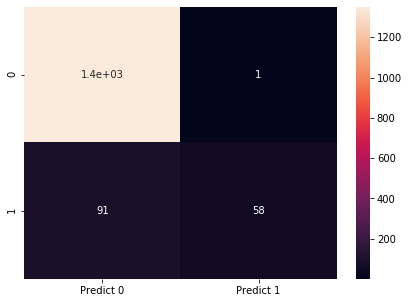

In [269]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

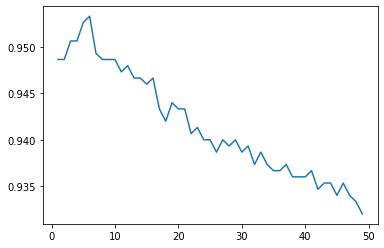

In [270]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))
    
plt.plot(range(1,50),scores)

In [271]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.55      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



In [272]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [273]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [274]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.8746666666666667


Confusion Matrix


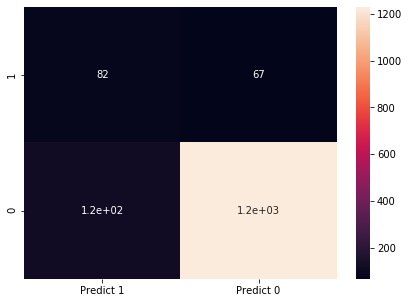

In [275]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [276]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.40      0.55      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



In [196]:
from sklearn import metrics

In [197]:
lr=LogisticRegression()
ypred_lr=lr.fit(X_train,y_train).predict(X_test)

In [198]:
print('F1 Score:',metrics.f1_score(y_test,ypred_lr,average='weighted'))
print('Kappa Score:',metrics.cohen_kappa_score(y_test,ypred_lr))
f1_lr=metrics.f1_score(y_test,ypred_lr,average='weighted')
kappa_lr=metrics.cohen_kappa_score(y_test,ypred_lr)

F1 Score: 0.9442993840087692
Kappa Score: 0.6662852784134248


In [199]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_lr))
acc_lr=metrics.accuracy_score(y_test,ypred_lr)
fpr,tpr,_=metrics.roc_curve(y_test,ypred_lr)
auc_lr=metrics.auc(fpr,tpr)
auc_lr

Accuracy: 0.9486666666666667


0.7863948653495546

In [211]:
final=pd.DataFrame({'Model':['Logistic Regression'],'F1_Score':f1_lr,'Kappa_Score':kappa_lr,'Accuracy':acc_lr,'AUC':auc_lr})
final

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,Logistic Regression,0.944299,0.666285,0.948667,0.786395


In [202]:
#Naive Bayes
from sklearn.model_selection import KFold
f1=[]
kappa=[]
acc=[]
a=[]
kf=KFold(n_splits=5,shuffle=True,random_state=100)
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    nb=GaussianNB()
    ypred_nb=nb.fit(xtrain,ytrain).predict(xtest)
    acc.append(metrics.accuracy_score(ytest,ypred_nb))
    fpr,tpr,_=metrics.roc_curve(ytest,ypred_nb)
    a.append(metrics.auc(fpr,tpr))
    f1.append(metrics.f1_score(ytest,ypred_nb,average='weighted'))
    kappa.append(metrics.cohen_kappa_score(ytest,ypred_nb))

In [203]:
X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1


In [204]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [205]:
acc_nb=np.mean(acc)
acc_nb

0.8872

In [206]:

f1_nb=np.mean(f1)
f1_nb

0.8946071796522063

In [207]:

kappa_nb=np.mean(kappa)
kappa_nb

0.43695569180051896

In [208]:

auc_nb=np.mean(a)
auc_nb

0.7528921838326721

In [209]:
z=pd.DataFrame({'Model':['Naives Bayes'],'F1_Score':f1_nb,'Kappa_Score':kappa_nb,'Accuracy':acc_nb,'AUC':auc_nb})
z

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,Naives Bayes,0.894607,0.436956,0.8872,0.752892


In [212]:

final=pd.concat([final,z])
final

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,Logistic Regression,0.944299,0.666285,0.948667,0.786395
0,Naives Bayes,0.894607,0.436956,0.887200,0.752892


In [213]:
knn=KNeighborsClassifier(n_neighbors=10,p=4)
ypred_Knn = knn.fit(X_train,y_train).predict(X_test)

In [214]:
print('F1 Score:',metrics.f1_score(y_test,ypred_Knn,average='weighted'))
print('Kappa Score:',metrics.cohen_kappa_score(y_test,ypred_Knn))
f1_knn=metrics.f1_score(y_test,ypred_Knn,average='weighted')
kappa_knn=metrics.cohen_kappa_score(y_test,ypred_Knn)

F1 Score: 0.9294947318007664
Kappa Score: 0.5559707138017458


In [215]:
print('Accuracy:',metrics.accuracy_score(y_test,ypred_Knn))
acc_knn=metrics.accuracy_score(y_test,ypred_Knn)
fpr,tpr,_=metrics.roc_curve(y_test,ypred_Knn)
auc_knn=metrics.auc(fpr,tpr)
auc_knn

Accuracy: 0.94


0.7099290110730804

In [216]:
z=pd.DataFrame({'Model':['KNN'],'F1_Score':f1_knn,'Kappa_Score':kappa_knn,'Accuracy':acc_knn,'AUC':auc_knn})
z

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,KNN,0.929495,0.555971,0.94,0.709929


In [217]:
final=pd.concat([final,z])
final

,Model,F1_Score,Kappa_Score,Accuracy,AUC
0,Logistic Regression,0.944299,0.666285,0.948667,0.786395
0,Naives Bayes,0.894607,0.436956,0.887200,0.752892
0,KNN,0.929495,0.555971,0.940000,0.709929


In [277]:
print('Reasoning for best model:')
    
print('The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.')

print('The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.')

print('The Naive Bayes giving less accuracy in comparison to other models meaning the probability of determing the target correctly is less.')

Reasoning for best model:
The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.
The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.
The Naive Bayes giving less accuracy in comparison to other models meaning the probability of determing the target correctly is less.
